In [1]:
# installation de nltk
!pip install --user -U nltk

In [2]:
import pandas as pd

# importation du document avec pandas pour creer un DataFrame
df = pd.read_csv('imdb_top_1000.csv')

df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# on elimine les chaines et les NaN pour pouvoir decrire en valeur numerique
def replace_str_by_zero(val):
  try:
    return float(val)
  except ValueError:
    return 0

df['IMDB_Rating'].fillna(0, inplace=True)
df['IMDB_Rating'] = df['IMDB_Rating'].apply(replace_str_by_zero)


In [4]:
df = df.drop(columns=['Released_Year', "Certificate", "Poster_Link", 'Runtime','Meta_score','Director','Star1','Star2','Star3','Star4','No_of_Votes','Gross'])
df.head()

,Series_Title,Genre,IMDB_Rating,Overview
0,The Shawshank Redemption,Drama,9.3,Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...
2,The Dark Knight,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...
3,The Godfather: Part II,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...
4,12 Angry Men,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    
    stemmer = PorterStemmer()
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return " ".join(tokens)


df['Series_Title'] = df['Series_Title'].apply(preprocess)
df['Genre'] = df['Genre'].apply(preprocess)
df['Overview'] = df['Overview'].apply(preprocess)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Series_Title,Genre,IMDB_Rating,Overview
0,shawshank redempt,drama,9.3,two imprison men bond number year find solac e...
1,godfath,crime drama,9.2,organ crime dynasti age patriarch transfer con...
2,dark knight,action crime drama,9.0,menac known joker wreak havoc chao peopl gotha...
3,godfath part ii,crime drama,9.0,earli life career vito corleon new york citi p...
4,angri men,crime drama,9.0,juri holdout attempt prevent miscarriag justic...


In [6]:
df['Series_Title'] = df['Series_Title'].str.strip()
df['Overview'] = df['Overview'].str.strip()
df['Genre'] = df['Genre'].str.strip()

df['Description'] =  df['Series_Title'] + ' ' + df['Overview'] + ' ' + df['Genre']

df.head()

,Series_Title,Genre,IMDB_Rating,Overview,Description
0,shawshank redempt,drama,9.3,two imprison men bond number year find solac e...,shawshank redempt two imprison men bond number...
1,godfath,crime drama,9.2,organ crime dynasti age patriarch transfer con...,godfath organ crime dynasti age patriarch tran...
2,dark knight,action crime drama,9.0,menac known joker wreak havoc chao peopl gotha...,dark knight menac known joker wreak havoc chao...
3,godfath part ii,crime drama,9.0,earli life career vito corleon new york citi p...,godfath part ii earli life career vito corleon...
4,angri men,crime drama,9.0,juri holdout attempt prevent miscarriag justic...,angri men juri holdout attempt prevent miscarr...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

tfidf_matrix = vectorizer.fit_transform(df['Description'])

tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()


,abandon,abbey,abduct,abductor,aberr,abil,abkhazia,abl,abnorm,aboard,...,zorg,zorn,zuckerberg,zulu,zwartboek,ángel,æbler,édith,ôkami,über
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.236445,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

k=50

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['IMDB_Rating'], test_size=0.2)

knn_50 = KNeighborsRegressor(metric='cosine', n_neighbors=k)
knn_50.fit(X_train, y_train)

y_pred = knn_50.predict(X_test)

In [9]:
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))

Mean squared error: 0.07


In [10]:
#Catégoriser les valeurs
def redifine_ratings(rate): 
    if (rate < 6):
        return "Moyen" 
    elif (rate < 8):
        return "Satisfaisant"
    elif (rate < 9):
        return "Bien Satisfaisant"
    elif (rate < 10):
        return "Excellent"

df["Ratings"] = df["IMDB_Rating"].apply(redifine_ratings)

df.head()

,Series_Title,Genre,IMDB_Rating,Overview,Description,Ratings
0,shawshank redempt,drama,9.3,two imprison men bond number year find solac e...,shawshank redempt two imprison men bond number...,Excellent
1,godfath,crime drama,9.2,organ crime dynasti age patriarch transfer con...,godfath organ crime dynasti age patriarch tran...,Excellent
2,dark knight,action crime drama,9.0,menac known joker wreak havoc chao peopl gotha...,dark knight menac known joker wreak havoc chao...,Excellent
3,godfath part ii,crime drama,9.0,earli life career vito corleon new york citi p...,godfath part ii earli life career vito corleon...,Excellent
4,angri men,crime drama,9.0,juri holdout attempt prevent miscarriag justic...,angri men juri holdout attempt prevent miscarr...,Excellent


In [11]:
df["Ratings"] = df["Ratings"].map({"Moyen": 0, "Satisfaisant": 1, "Bien Satisfaisant": 2, "Excellent": 3})
df["Ratings"]

0      3
1      3
2      3
3      3
4      3
      ..
995    1
996    1
997    1
998    1
999    1
Name: Ratings, Length: 1000, dtype: int64

In [12]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df["Ratings"], test_size=0.2, random_state=42)

X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

k = 30
knn_30 = KNeighborsClassifier(metric='cosine', n_neighbors=k)

knn_30.fit(X_train, y_train)

knn_y_pred = knn_30.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

Multinomial_nb = MultinomialNB()

Multinomial_nb.fit(X_train, y_train)

Multinomial_nb_y_pred = Multinomial_nb.predict(X_test)


In [14]:
#Evaluation de KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, knn_y_pred)
precision = precision_score(y_test, knn_y_pred, average='weighted')
recall = recall_score(y_test, knn_y_pred, average='weighted')
f1 = f1_score(y_test, knn_y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.55
Precision: 0.5395135412655628
Recall: 0.55
F1-score: 0.5240234374999999


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

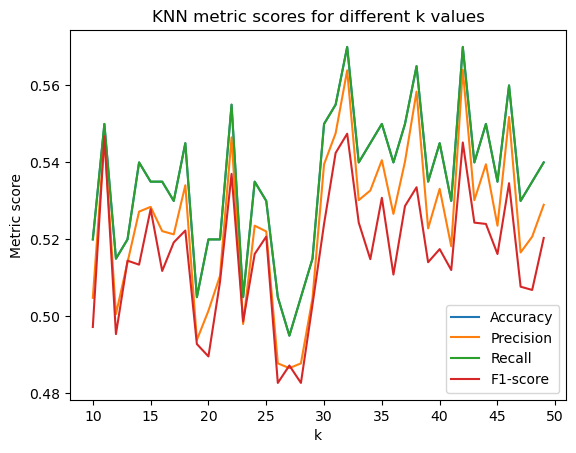

In [15]:
import matplotlib.pyplot as plt

k_range = range(10, 50)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_range:
    # create a KNN classifier with the current k value
    knn = KNeighborsClassifier(metric='cosine', n_neighbors=k)
    # fit the classifier to the training data
    knn.fit(X_train, y_train)
    # predict the test data
    y_pred = knn.predict(X_test)
    # append the metric scores to their respective lists
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

plt.plot(k_range, accuracy_scores, label='Accuracy')
plt.plot(k_range, precision_scores, label='Precision')
plt.plot(k_range, recall_scores, label='Recall')
plt.plot(k_range, f1_scores, label='F1-score')
plt.xlabel('k')
plt.ylabel('Metric score')
plt.title('KNN metric scores for different k values')
plt.legend()
plt.show()

In [16]:
#Evaluation de Naive Bayes
accuracy = accuracy_score(y_test, Multinomial_nb_y_pred)
precision = precision_score(y_test, Multinomial_nb_y_pred, average='weighted')
recall = recall_score(y_test, Multinomial_nb_y_pred, average='weighted')
f1 = f1_score(y_test, Multinomial_nb_y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.54
Precision: 0.5215757575757576
Recall: 0.54
F1-score: 0.48478507704785073


In [17]:
def predict_for_movie():
    titre_avant_process = input("Titre: ")
    titre = preprocess(titre_avant_process)
    overview = preprocess(input('Overview: '))
    genre = preprocess(input('Genre: '))
    description = titre + ' ' + overview + ' ' + genre

    tfidf_matrix = vectorizer.transform([description])

    tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=vectorizer.get_feature_names_out())

    prediction = knn_30.predict(tfidf_df)[0]

    print(titre_avant_process + " :", end=' ')
    if (prediction == 0):
        print('Moyen')
    elif (prediction == 1):
        print('Satisfaisant')
    elif (prediction == 2):
        print('Bien Satisfaisant')
    elif (prediction == 3):
        print('Excellent')

    print('Rating Possible: ', knn_50.predict(tfidf_df)[0])


predict_for_movie()

Titre: dark knight
Overview: super human who save people
Genre: action


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


dark knight : Bien Satisfaisant
Rating Possible:  8.006000000000002
